<a href="https://colab.research.google.com/github/irwanrezaf/Data-Mining-Perkembangan-Covid19-di-Indonesia/blob/main/Computing_Lab_Internship_Task_7_0_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 6

Computing Laboratory Internship Task 7.0 - Week 1


Diberikan sebuah dataset statistik perkembangan kasus covid19 di Indonesia

In [1]:
!wget -qN https://raw.githubusercontent.com/MAAF72/maaf72.github.io/master/nitip/Statistik_Perkembangan_Kasus_COVID19_Indonesia_Februari_2021.csv 

In [2]:
# Import library datetime, pandas dan matplotlib
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Baca file Statistik_Perkembangan_Kasus_COVID19_Indonesia_Februari_2021.csv ke variable df, gunakan kolom 'Hari_ke' sebagai index
df = pd.read_csv('Statistik_Perkembangan_Kasus_COVID19_Indonesia_Februari_2021.csv', index_col='Hari_ke')
df.head()

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat,Jumlah_Spesimen_Diperiksa,Jumlah_Kasus_Diperiksa,Jumlah_Negatif,Spesimen_Diperiksa_Baru_Harian,Kasus_Diperiksa_Baru_Harian,PDP,ODP,Penambahan_Kasus_Terkonfirmasi_,Kasus_Sedang_Investigasi_Lapang,Jumlah_Spesimen_Diperiksa_Terki,Jumlah_Kasus_Diperiksa_Terkini,Spesimen_Diperiksa_Baru_Harian_,Jumlah_Kasus_Diperiksa_Harian_T,Hasil_Positif_Terkini,Hasil_Negatif_Terkini,PDP_Terkini,ODP_Terkini,Suspek_Terkini,Jumlah_Provinsi_Terdampak,Jumlah_KabKot_Terdampak,Pembaruan_Terakhir,FID
Hari_ke,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
160,2020/08/08 00:00:00+00,123503.0,79306.0,5658.0,38539.0,2277.0,1749.0,65.0,463.0,64.213825,4.581265,31.204910,1693880.0,963602.0,840099.0,30565.0,11692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,1
1,2020/03/02 00:00:00+00,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.000000,0.000000,100.000000,NaN,339.0,335.0,NaN,NaN,NaN,NaN,8435.0,166492.0,9933751.0,6591580.0,71511.0,38401.0,1191990.0,5399590.0,13439.0,33504.0,76911.0,34.0,510.0,2021/02/11 09:55:54+00,2
161,2020/08/09 00:00:00+00,125396.0,80952.0,5723.0,38721.0,1893.0,1646.0,65.0,182.0,64.557083,4.563941,30.878975,1715798.0,972594.0,847198.0,21918.0,8992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,3
162,2020/08/10 00:00:00+00,127083.0,82236.0,5765.0,39082.0,1687.0,1284.0,42.0,361.0,64.710465,4.536405,30.753130,1731634.0,984893.0,857810.0,15836.0,12299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,4
163,2020/08/11 00:00:00+00,128776.0,83710.0,5824.0,39242.0,1693.0,1474.0,59.0,160.0,65.004349,4.522582,30.473070,1757425.0,998406.0,869630.0,25791.0,13513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,5


In [4]:
# Hapus kolom yang terdapat pada list unused dari DataFrame df
unused = ['Kasus_Diperiksa_Baru_Harian', 'Jumlah_Kasus_Diperiksa', 'Jumlah_Spesimen_Diperiksa', 'Spesimen_Diperiksa_Baru_Harian', 'Jumlah_Negatif', 'PDP', 'ODP', 'Penambahan_Kasus_Terkonfirmasi_', 'Kasus_Sedang_Investigasi_Lapang', 'Jumlah_Spesimen_Diperiksa_Terki', 'Jumlah_Kasus_Diperiksa_Terkini', 'Spesimen_Diperiksa_Baru_Harian_', 'Jumlah_Kasus_Diperiksa_Harian_T', 'Hasil_Positif_Terkini', 'Hasil_Negatif_Terkini', 'PDP_Terkini', 'ODP_Terkini', 'Suspek_Terkini', 'Jumlah_Provinsi_Terdampak',  'Jumlah_KabKot_Terdampak', 'Pembaruan_Terakhir', 'FID']
df_used = df.drop(unused, axis=1)
df_used.head()

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
160,2020/08/08 00:00:00+00,123503.0,79306.0,5658.0,38539.0,2277.0,1749.0,65.0,463.0,64.213825,4.581265,31.204910
1,2020/03/02 00:00:00+00,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.000000,0.000000,100.000000
161,2020/08/09 00:00:00+00,125396.0,80952.0,5723.0,38721.0,1893.0,1646.0,65.0,182.0,64.557083,4.563941,30.878975
162,2020/08/10 00:00:00+00,127083.0,82236.0,5765.0,39082.0,1687.0,1284.0,42.0,361.0,64.710465,4.536405,30.753130
163,2020/08/11 00:00:00+00,128776.0,83710.0,5824.0,39242.0,1693.0,1474.0,59.0,160.0,65.004349,4.522582,30.473070


In [5]:
# Ubah tipe data kolom Tanggal ke datetime
df_used['Tanggal'] = pd.to_datetime(df_used['Tanggal'])
df_used.head()

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
160,2020-08-08 00:00:00+00:00,123503.0,79306.0,5658.0,38539.0,2277.0,1749.0,65.0,463.0,64.213825,4.581265,31.204910
1,2020-03-02 00:00:00+00:00,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.000000,0.000000,100.000000
161,2020-08-09 00:00:00+00:00,125396.0,80952.0,5723.0,38721.0,1893.0,1646.0,65.0,182.0,64.557083,4.563941,30.878975
162,2020-08-10 00:00:00+00:00,127083.0,82236.0,5765.0,39082.0,1687.0,1284.0,42.0,361.0,64.710465,4.536405,30.753130
163,2020-08-11 00:00:00+00:00,128776.0,83710.0,5824.0,39242.0,1693.0,1474.0,59.0,160.0,65.004349,4.522582,30.473070


In [6]:
# Urutkan data berdasarkan indexnya secara menaik
df_used.sort_index(inplace=True)
df_used.head()

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
1,2020-03-02 00:00:00+00:00,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,100.0
2,2020-03-03 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,2020-03-04 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,2020-03-05 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
5,2020-03-06 00:00:00+00:00,4.0,0.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,0.0,100.0


In [7]:
# Tampilkan 30 data pertama dari DataFrame df
df_used.head(30)

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
1,2020-03-02 00:00:00+00:00,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.000000,0.000000,100.000000
2,2020-03-03 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.000000
3,2020-03-04 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.000000
4,2020-03-05 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.000000
5,2020-03-06 00:00:00+00:00,4.0,0.0,0.0,4.0,2.0,0.0,0.0,2.0,0.000000,0.000000,100.000000
6,2020-03-07 00:00:00+00:00,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.000000
7,2020-03-08 00:00:00+00:00,6.0,0.0,0.0,6.0,2.0,0.0,0.0,2.0,0.000000,0.000000,100.000000
8,2020-03-09 00:00:00+00:00,19.0,0.0,0.0,19.0,13.0,0.0,0.0,13.0,0.000000,0.000000,100.000000
9,2020-03-10 00:00:00+00:00,27.0,2.0,0.0,25.0,8.0,2.0,0.0,6.0,7.407407,0.000000,92.592593


In [8]:
# Tampilkan data pada hari ke-261 sampai hari ke-263 Covid19
df_used.loc[261:263]

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
261,2020-11-17 00:00:00+00:00,474455.0,398636.0,15393.0,60426.0,3807.0,3193.0,97.0,517.0,84.019770,3.244354,12.735876
262,2020-11-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,2020-11-19 00:00:00+00:00,483518.0,406612.0,15600.0,61306.0,9063.0,7976.0,207.0,880.0,84.094491,3.226354,12.679156


Perhatikan dengan seksama!
Diketahui data hari ke-262 hilang dan ada beberapa data pada hari ke-263 yang merupakan rapelan data rekapan hari ke-262 dan hari ke-263
Jika diketahui data pada hari ke-263 yang sesungguhnya adalah sebagai berikut :
- Jumlah_Kasus_Baru_per_Hari = 4798
- Jumlah_Kasus_Sembuh_per_Hari = 4265
- Jumlah_Kasus_Meninggal_per_Hari = 97
- Jumlah_Kasus_Dirawat_per_Hari = 436

(Untuk nilai kolom yang lain sudah benar)

Maka, perbaikilah data pada hari ke-263 dan lengkapi data pada hari ke-262!


[LAKUKAN ANALISIS TENTANG KETERKAITAN ANTAR DATA DAN ANTAR KOLOM TERLEBIH DAHULU]

*#Kasus baru = #sembuh + #meninggal + #dirawat

In [9]:
# copy some data from 'Jumlah_Kasus_Kumulatif' column to 'Presentase_Paseien_dalam_Perawat' column from rows 263 to 262
df_used.loc[[262], 'Jumlah_Kasus_Kumulatif':'Persentase_Pasien_dalam_Perawat'] = df_used.loc[263].values[1:]

In [10]:
# update data
df_used.at[263, 'Jumlah_Kasus_Baru_per_Hari'] = 4798
df_used.at[263, 'Jumlah_Kasus_Sembuh_per_Hari'] = 4265
df_used.at[263, 'Jumlah_Kasus_Meninggal_per_Hari'] = 97
df_used.at[263, 'Jumlah_Kasus_Dirawat_per_Hari'] = 436

In [11]:
# Tampilkan kembali data hari ke-262 dan data hari ke-263
df_used.loc[262:263]

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
262,2020-11-18 00:00:00+00:00,483518.0,406612.0,15600.0,61306.0,9063.0,7976.0,207.0,880.0,84.094491,3.226354,12.679156
263,2020-11-19 00:00:00+00:00,483518.0,406612.0,15600.0,61306.0,4798.0,4265.0,97.0,436.0,84.094491,3.226354,12.679156


In [12]:
# Berapa jumlah pertambahan kasus pada bulan Januari 2021
sumnya = df_used.loc[(df_used['Tanggal'] >= '2021-1-1') & (df_used['Tanggal'] <= '2021-1-31')]["Jumlah_Kasus_Baru_per_Hari"].sum()
print(f'Pertambahan kasus pada bulan Januari 2021 adalah {int(sumnya)} kasus')

Pertambahan kasus pada bulan Januari 2021 adalah 335116 kasus


In [13]:
# menampilkan data pada tanggal 18 november 2020
df_used.loc[df_used['Tanggal'] == '2020-11-18']

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
262,2020-11-18 00:00:00+00:00,483518.0,406612.0,15600.0,61306.0,9063.0,7976.0,207.0,880.0,84.094491,3.226354,12.679156


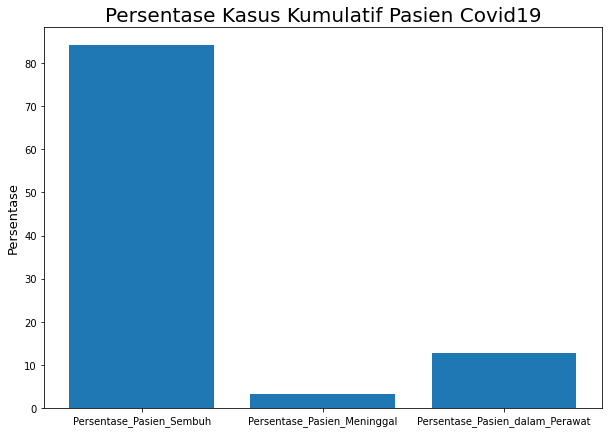

In [14]:
# Buatlah sebuah grafik yang menampilkan persentase kasus kumulatif (dalam perawatan, sembuh, meninggal) pasien Covid19 pada tanggal 18 November 2020
labels = ['Persentase_Pasien_Sembuh', 'Persentase_Pasien_Meninggal', 'Persentase_Pasien_dalam_Perawat']
valuelabels = df_used.loc[df_used['Tanggal'] == '2020-11-18', 'Persentase_Pasien_Sembuh':'Persentase_Pasien_dalam_Perawat'].values.ravel().tolist()
fig = plt.figure(figsize=(10,7))
plt.bar(labels, valuelabels)
plt.title("Persentase Kasus Kumulatif Pasien Covid19",  loc='center', fontsize=20)
plt.ylabel('Persentase', fontsize=13)
plt.show()

In [15]:
# menampilkan data dari maret 2020 sampai 2021
df_used.loc[(df_used['Tanggal'] >= '2020-3-1') & (df_used['Tanggal'] <= '2021-2-28')]

,Tanggal,Jumlah_Kasus_Kumulatif,Jumlah_Pasien_Sembuh,Jumlah_Pasien_Meninggal,Jumlah_Pasien_Dalam_Perawatan,Jumlah_Kasus_Baru_per_Hari,Jumlah_Kasus_Sembuh_per_Hari,Jumlah_Kasus_Meninggal_per_Hari,Jumlah_Kasus_Dirawat_per_Hari,Persentase_Pasien_Sembuh,Persentase_Pasien_Meninggal,Persentase_Pasien_dalam_Perawat
Hari_ke,,,,,,,,,,,,
1,2020-03-02 00:00:00+00:00,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,100.0
2,2020-03-03 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,2020-03-04 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,2020-03-05 00:00:00+00:00,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
5,2020-03-06 00:00:00+00:00,4.0,0.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-02-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2021-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2021-02-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


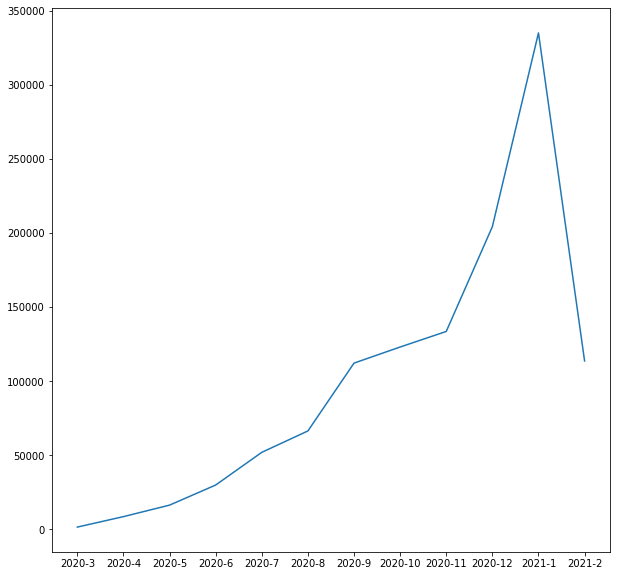

In [16]:
# Buatlah sebuah grafik yang menampilkan jumlah pertambahan kasus per bulan dari bulan Maret 2020 sampai Februari 2021
plt.figure(figsize=(10,10))
Y = []
X = []
# menjumlah pertambahan kasus per bulan
for i in range(3,13):
  Y.append(df_used.set_index(['Tanggal'])['2020-'+str(i)]['Jumlah_Kasus_Baru_per_Hari'].sum())
  X.append('2020-'+str(i))
for i in range(1,3):
  Y.append(df_used.set_index(['Tanggal'])['2021-'+str(i)]['Jumlah_Kasus_Baru_per_Hari'].sum())
  X.append('2021-'+str(i))


ax = plt.subplot()
ax.plot(X, Y)
plt.show()

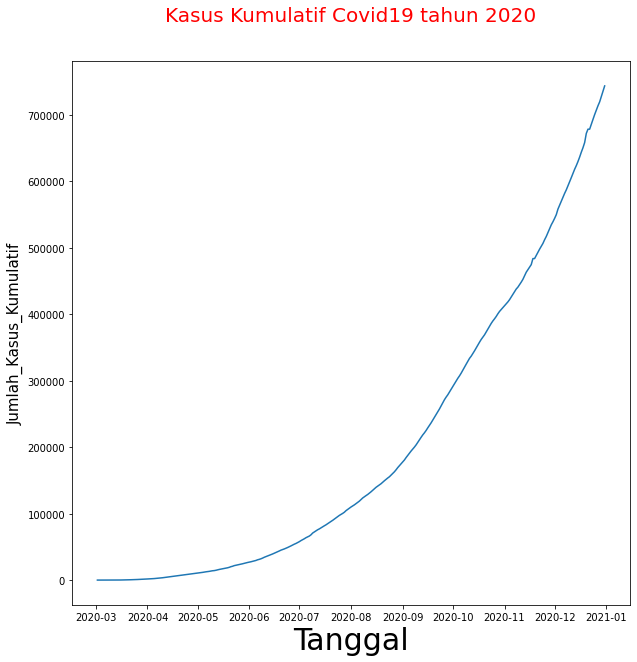

In [17]:
# Buatlah sebuah grafik kasus kumulatif Covid19 selama tahun 2020
plt.figure(figsize=(10, 10))
Y = df_used.loc[(df_used['Tanggal'] >= '2020-1-1') & (df_used['Tanggal'] <= '2020-12-31')]['Jumlah_Kasus_Kumulatif']
X = df_used.loc[(df_used['Tanggal'] >= '2020-1-1') & (df_used['Tanggal'] <= '2020-12-31')]['Tanggal']
ax = plt.subplot()
ax.plot(X, Y)
plt.title('Kasus Kumulatif Covid19 tahun 2020', loc='center', pad=40, fontsize=20, color='red')
plt.xlabel('Tanggal', fontsize=30)
plt.ylabel('Jumlah_Kasus_Kumulatif', fontsize=15)
plt.show()